In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import random as rd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D , Convolution2D, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import backend as K
#K.set_image_data_format('channels_first')

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [47]:
DATA_PART_ONE_PATH = r'Dataset\malechar1.csv'
DATA_PART_TWO_PATH = r'Dataset\malechar2.csv'

In [48]:
dataset_one = pd.read_csv(DATA_PART_ONE_PATH, index_col = None)
dataset_two = pd.read_csv(DATA_PART_TWO_PATH, index_col = None)

In [49]:
dataset_one.head()

#dataset = pd.read_csv('train.csv')

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,1,1,1,1,1,0,1,0,1,1,...,0,0,1,5,1,65,253,123,0,10
1,2,1,36,14,0,2,0,1,0,0,...,2,152,245,20,0,3,0,0,0,10
2,0,0,0,0,0,1,0,1,0,0,...,1,1,4,0,145,59,0,2,0,10
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,10
4,0,0,0,0,0,1,0,1,5,0,...,102,248,167,1,3,0,0,0,0,10


In [50]:
dataset_two.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,35
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,35
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35


In [51]:
dataset = pd.concat([dataset_one, dataset_two])

In [52]:
labels = dataset['label']

In [53]:
val, count = np.unique(labels, return_counts=True)

In [54]:
print(val)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59]


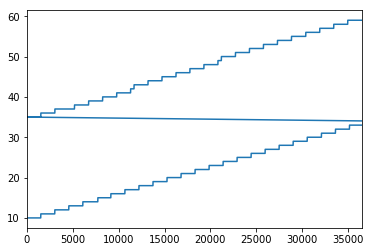

In [55]:
labels.plot(kind='line')

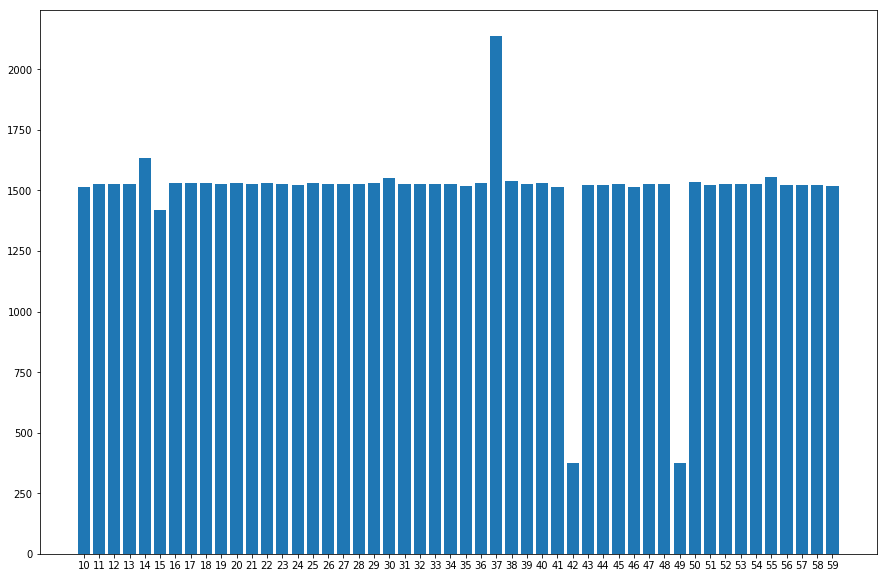

In [61]:
plt.figure(figsize=(15,10))
plt.bar(val, count)
plt.xticks(val)
plt.savefig('data.png')
plt.show()

In [62]:
sum(count)

74663

In [5]:
num_classes = len(labels.unique())

In [6]:
dataset.drop('label' , axis=1, inplace=True)

In [7]:
dataset.reset_index(drop=True, inplace=True)

In [8]:
dataset.shape

(42000, 784)

In [9]:
dataset = dataset.values.reshape(-1,28,28,1)

In [10]:
dataset[0].shape

(28, 28, 1)

In [11]:
def plot_image(data, rows = 4, columns = 5):
    
    fig=plt.figure(figsize=(10, 10))
    
    for i in range(1, columns*rows +1):
        index = rd.randint(0, len(data))
        fig.add_subplot(rows, columns, i)
        plt.imshow(np.squeeze(data[index]), cmap='gray')
        plt.savefig('sample.png')
    plt.show()

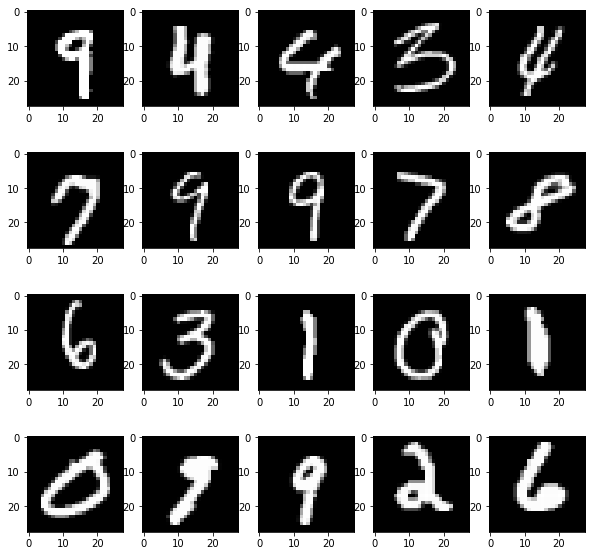

In [12]:
plot_image(dataset)

In [13]:
dataset.shape

(42000, 28, 28, 1)

In [14]:
#label_encoder = LabelEncoder()
#labels = label_encoder.fit_transform(labels)

one_h_encoder = OneHotEncoder()
labels = one_h_encoder.fit_transform(labels.reshape(-1,1))


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [16]:
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs



#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)






num_classes = y_test.shape[1]

model.summary()

In [17]:
def history_plot(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.savefig('Accuracy.png')
    plt.show()
    
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.savefig('loss.png')
    plt.show()
   

model.fit(X_train, y_train , epochs=25, batch_size = 32, validation_split = 0.2, shuffle=True, verbose=1)

In [30]:
model = Sequential()
weight_decay = 0.0005


model.add(Conv2D(32, (3, 3), padding='same',input_shape=(28,28,1),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(GlobalMaxPooling2D())


model.add(Dense(256,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
__________

In [32]:
history = model.fit(X_train, y_train , epochs=25, batch_size = 32, validation_split = 0.2, shuffle=True, verbose=1)

Train on 26880 samples, validate on 6720 samples
Epoch 1/25
26880/26880 [==============================] - 38s 1ms/step - loss: 0.9270 - acc: 0.9108 - val_loss: 0.9251 - val_acc: 0.8512
Epoch 2/25
26880/26880 [==============================] - 29s 1ms/step - loss: 0.4770 - acc: 0.9625 - val_loss: 0.3950 - val_acc: 0.9656
Epoch 3/25
26880/26880 [==============================] - 29s 1ms/step - loss: 0.3714 - acc: 0.9680 - val_loss: 0.4185 - val_acc: 0.9482
Epoch 4/25
26880/26880 [==============================] - 29s 1ms/step - loss: 0.3430 - acc: 0.9693 - val_loss: 0.5915 - val_acc: 0.9048
Epoch 5/25
26880/26880 [==============================] - 28s 1ms/step - loss: 0.3229 - acc: 0.9713 - val_loss: 0.2929 - val_acc: 0.9780
Epoch 6/25
26880/26880 [==============================] - 29s 1ms/step - loss: 0.3043 - acc: 0.9737 - val_loss: 0.2770 - val_acc: 0.9799
Epoch 7/25
26880/26880 [==============================] - 31s 1ms/step - loss: 0.2945 - acc: 0.9752 - val_loss: 0.2817 - val_acc:

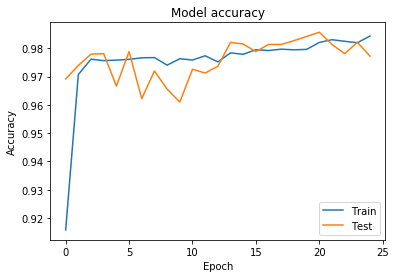

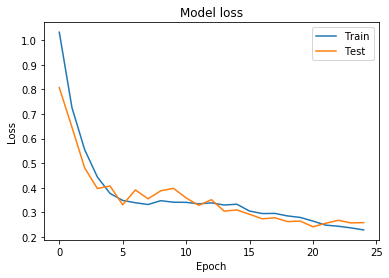

In [21]:
history_plot(history)

In [22]:
model.evaluate(X_test, y_test)

8400/8400 [==============================] - 2s 262us/step


[0.25564749121665953, 0.9755952380952381]

In [25]:
#model.save('model.h5')

In [23]:
test_img = X_test[rd.randint(0, len(X_test))]

In [24]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_img.reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size): 
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
    plt.savefig('layer'+str(act_index)+'.png')

In [25]:
len(X_test)

8400

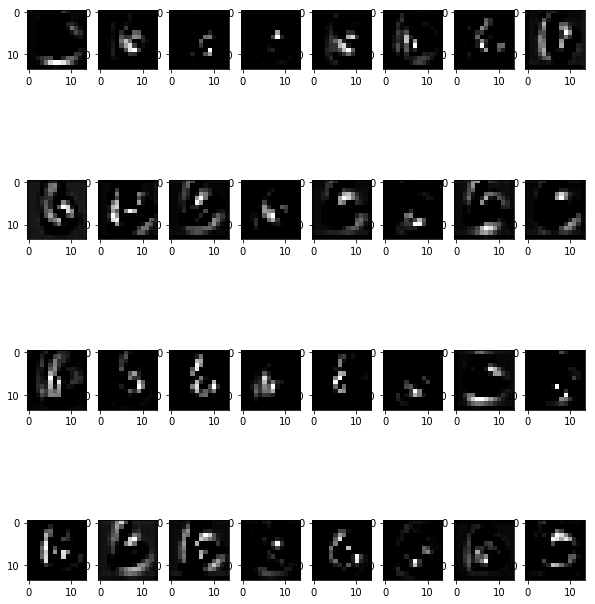

In [26]:
display_activation(activations, 8, 4, 12)

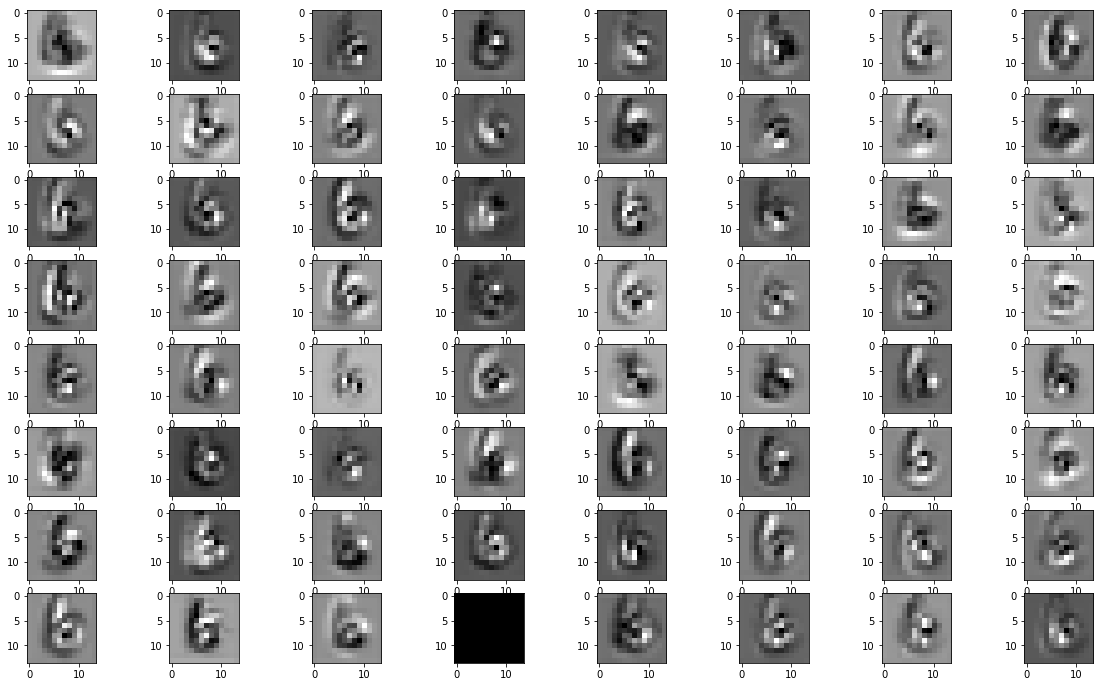

In [27]:
display_activation(activations, 8, 8, 11)

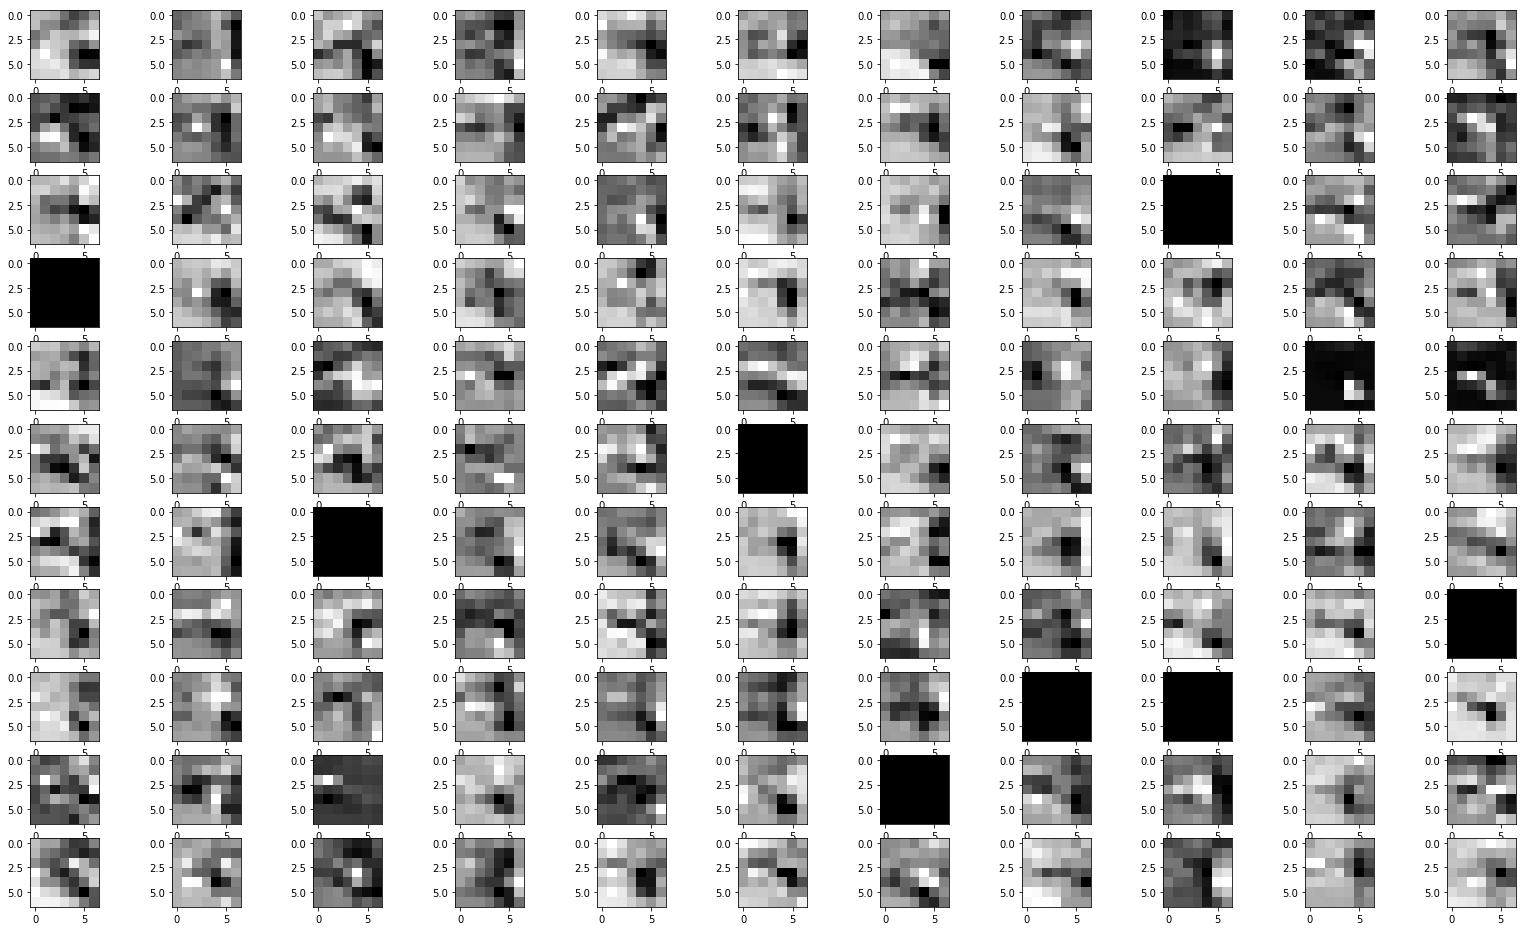

In [30]:
display_activation(activations, 11, 11, 22)

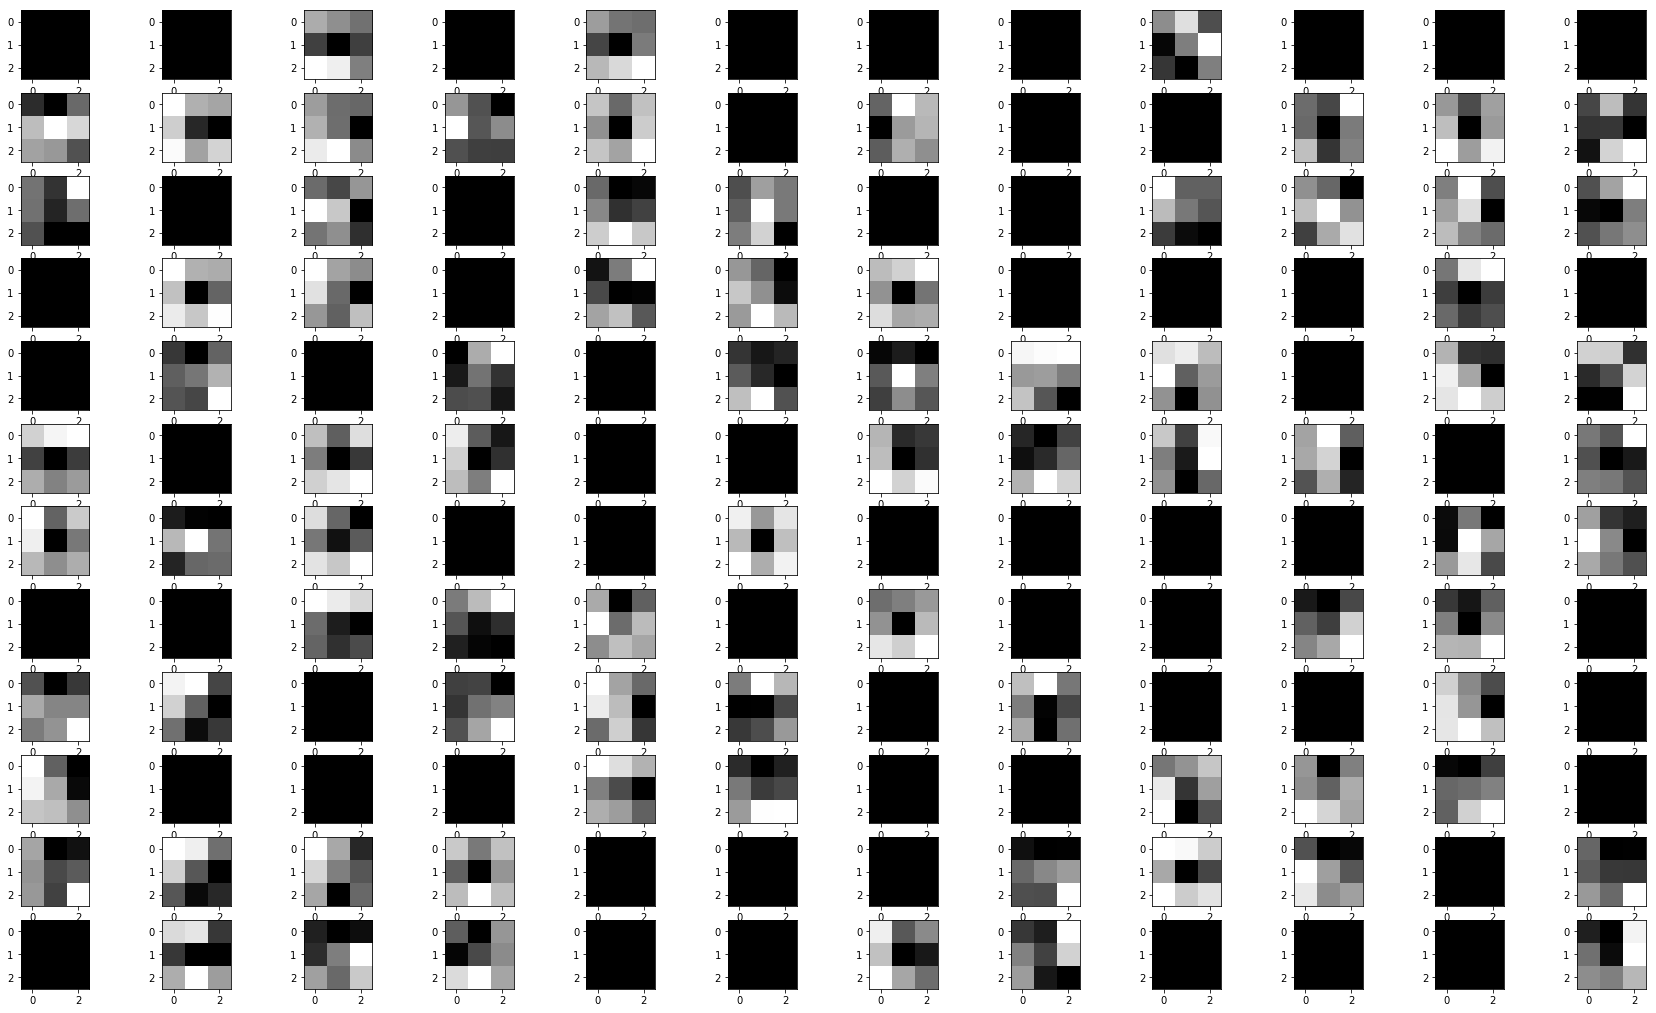

In [31]:
display_activation(activations, 12, 12, 33)